In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', 100)

/Users/olgapalchul/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
path = '/Users/olgapalchul/Downloads/counterparty-analysis/'
df = pd.read_csv(path + 'agents2019.csv',index_col='Наименование ДП')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 0 to 530
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Макс. ПДЗ за 2019 год, дней                        531 non-null    int64  
 1   Сред. ПДЗ за 2019 год, дней                        531 non-null    float64
 2   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  531 non-null    int64  
 3   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  531 non-null    float64
 4   Кол-во раз ПДЗ за 2019 год, шт.                    531 non-null    int64  
 5   2016, Нематериальные активы, RUB                   531 non-null    float64
 6   2017, Нематериальные активы, RUB                   531 non-null    float64
 7   2018, Нематериальные активы, RUB                   531 non-null    float64
 8   2016, Основные средства , RUB                      531 non-null    float64
 9   2017, Осно

In [4]:
df[df.isnull().any(axis = 1)]

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
Наименование ДП,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [5]:
columns = [
        'Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.', '2016, Нематериальные активы, RUB', '2017, Нематериальные активы, RUB',\
          '2018, Нематериальные активы, RUB', '2016, Основные средства , RUB', '2017, Основные средства , RUB','2018, Основные средства , RUB',\
        '2016, Внеоборотные активы, RUB', '2017, Внеоборотные активы, RUB', '2018, Внеоборотные активы, RUB',\
        '2016, Дебиторская задолженность, RUB', '2017, Дебиторская задолженность, RUB', '2018, Дебиторская задолженность, RUB', \
        '2016, Оборотные активы, RUB', '2017, Оборотные активы, RUB', '2018, Оборотные активы, RUB', \
        '2016, Уставный капитал , RUB', '2017, Уставный капитал , RUB' ,'2018, Уставный капитал , RUB',\
        '2016, Капитал и резервы, RUB', '2017, Капитал и резервы, RUB', '2018, Капитал и резервы, RUB',\
        '2016, Заёмные средства (долгосрочные), RUB', '2017, Заёмные средства (долгосрочные), RUB', '2018, Заёмные средства (долгосрочные), RUB',
        '2018, Долгосрочные обязательства, RUB', '2016, Долгосрочные обязательства, RUB', '2017, Долгосрочные обязательства, RUB', \
        '2016, Заёмные средства (краткосрочные), RUB', '2017, Заёмные средства (краткосрочные), RUB', '2018, Заёмные средства (краткосрочные), RUB', \
        '2016, Кредиторская задолженность, RUB', '2017, Кредиторская задолженность, RUB', '2018, Кредиторская задолженность, RUB', \
        '2016, Краткосрочные обязательства, RUB', '2017, Краткосрочные обязательства, RUB', '2018, Краткосрочные обязательства, RUB',\
        '2016, Выручка, RUB', '2017, Выручка, RUB', '2018, Выручка, RUB',\
        '2016, Себестоимость продаж, RUB', '2017, Себестоимость продаж, RUB','2018, Себестоимость продаж, RUB', \
        '2016, Прибыль (убыток) до налогообложения , RUB', '2017, Прибыль (убыток) до налогообложения , RUB', '2018, Прибыль (убыток) до налогообложения , RUB',\
        '2016, Прибыль (убыток) от продажи, RUB', '2017, Прибыль (убыток) от продажи, RUB', '2018, Прибыль (убыток) от продажи, RUB', 
          ]

In [6]:
# переведу суммы в миллионы
for col in columns:
    df[col] = df[col] / 1000000


In [7]:
df[df['2016, Основные средства , RUB'] == 0]
# упс! 123 строки с пропущенными значениями

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB"
Наименование ДП,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
83,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,0.000000,67.416561,0.000000,0.000000,68.480892,0.000000,0.000000,50.907643,0.000000,0.000000,109.888535,0.000000,0.000000,0.006369,0.000000,0.000000,6.294268,0.000000,0.000000,75.740127,0.000000,0.000000,76.656051,0.000000,0.000000,40.095541,0.000000,0.000000,55.323567,0.000000,0.000000,95.419108,0.000000,0.000000,462.431847,0.000000,0.000000,419.747134,0.000000,0.000000,5.396815,0.000000,0.000000,18.283439
106,101,13.369565,20,12.091625,46,0.0,0.0,0.0,0.0,0.000000,0.958599,0.000000,0.000000,0.971975,0.000000,0.000000,5.169427,0.000000,0.000000,10.328662,0.000000,0.000000,0.978344,0.000000,0.000000,5.610828,0.000000,0.000000,0.000000,0.000000,0.000000,0.440127,0.000000,0.000000,0.000000,0.000000,0.000000,5.249682,0.000000,0.000000,5.249682,0.000000,0.000000,44.129299,0.000000,0.000000,43.567516,0.000000,0.000000,0.353503,0.000000,0.000000,0.561783
145,0,0.000000,0,0.000000,0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.138854,1.138854,0.000000,43.401274,42.271338,30.712102,74.405732,76.207643,63.420382,0.006369,0.006369,0.006369,7.463694,8.600000,7.308917,32.175796,21.791720,26.905732,32.175796,21.791720,26.905732,1.878344,5.661146,1.600000,34.026752,41.293631,27.605096,35.905096,46.954777,29.205096,337.566879,362.489809,382.189809,300.726752,318.235032,345.064331,4.317834,1.561783,5.061146,-1.207643,17.588535,10.064331
149,7,3.153846,1,1.081952,13,0.0,0.0,0.0,0.0,0.000000,51.468790,0.000000,0.000000,51.468790,0.000000,0.000000,245.917834,0.000000,0.000000,324.466879,0.000000,0.000000,0.006369,0.000000,0.000000,103.401911,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001274,0.000000,0.000000,53.379618,0.000000,0.000000,272.533758,0.000000,0.000000,940.501911,0.000000,0.000000,892.746497,0.000000,0.000000,19.390446,0.000000,0.000000,14.424841
163,4,1.666667,0,0.000000,12,0.0,0.0,0.0,0.0,0.561783,0.328025,0.000000,0.564968,0.328025,0.000000,6.944586,10.782166,0.000000,16.5

In [8]:
df = df.loc[(df['2016, Основные средства , RUB'] != 0)]
df.info()

df[df['2016, Основные средства , RUB'] == 0]
df['bool'] = df['Макс. ПДЗ за 2019 год, дней'] > 0
# df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 529
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Макс. ПДЗ за 2019 год, дней                        408 non-null    int64  
 1   Сред. ПДЗ за 2019 год, дней                        408 non-null    float64
 2   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  408 non-null    int64  
 3   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  408 non-null    float64
 4   Кол-во раз ПДЗ за 2019 год, шт.                    408 non-null    int64  
 5   2016, Нематериальные активы, RUB                   408 non-null    float64
 6   2017, Нематериальные активы, RUB                   408 non-null    float64
 7   2018, Нематериальные активы, RUB                   408 non-null    float64
 8   2016, Основные средства , RUB                      408 non-null    float64
 9   2017, Осно

In [ ]:
df.sort_values('Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.', ascending=False).head()

In [ ]:
df.sort_values('Кол-во просрочек свыше 5-ти дней за 2019 год, шт.', ascending=False).head()

In [ ]:
df.sort_values('Макс. ПДЗ за 2019 год, дней', ascending=False).head(10)

Просроченная ДЗ - задолженность, не погашенная в сроки, установленные договорами или законодательством. В случаях когда в договорах не указаны конкретные сроки расчетов, в просроченную задолженность включается задолженность, не погашенная в течение 60 дней (с даты отражения задолженности в бухгалтерском учете) по внутриреспубликанским расчетам и 90 дней – по внешним расчетам. Задолженность не будет относиться к просроченной в случае подписания дополнительного договора, в котором будет изменен срок оплаты.
Статья: https://minsk-city.belstat.gov.by/informatsiya-dlya-respondenta/metodologicheskie-kommentarii/otrasli-statistiki_2/finansy_2/poyasneniya-po-forme-12-f-raschety/

Мы видим, у нас есть длительные долги - свыше двух лет. Долг списывается с учета, если с установленной договором даты оплаты прошло 3 года (ст. 196 ГК РФ), а денежные средства или иные активы от покупателя не поступили. Стоит отметить, что по некоторым предприятиям отсутствует информация в некоторых столбцах. <br>
Просроченная задолженность с истекшим сроком исковой давности называется коротко — безнадежным долгом. Это означает, что:<br>
фирма предприняла все возможные усилия для ее взыскания, но они не увенчались успехом;<br>
вероятность возврата долга нулевая;<br>
по закону долг не может больше числиться в бухгалтерском и налоговом учете.<br>
Статья: https://nalog-nalog.ru/buhgalterskij_uchet/vedenie_buhgalterskogo_ucheta/chto_takoe_prosrochennaya_debitorskaya_zadolzhennost/

Введем столбцы активов, пассивов и капитала - основных показателей состояния предприятия. <br>Также введем соотношение дебиторской задолженности к активам и отношение кредитов к пассивам, найдем соотношение этих коффициентов как показателей устойчивости предприятия<br>Собственные оборотные средства  используются для оценки возможности предприятия рассчитаться по краткосрочным обязательствам

In [10]:
years = ['2016, ', '2017, ', '2018, ']


for year in years:
    df[f"{year}activ"] = df[f"{year}Нематериальные активы, RUB"] + df[f"{year}Основные средства , RUB"] + \
                        df[f"{year}Внеоборотные активы, RUB"] + df[f"{year}Дебиторская задолженность, RUB"] + \
                        df[f"{year}Оборотные активы, RUB"]
        
    df[f"{year}capital"] = df[f"{year}Уставный капитал , RUB"] + df[f"{year}Капитал и резервы, RUB"]

    df[f"{year}passiv"] = df[f"{year}Заёмные средства (долгосрочные), RUB"] + df[f"{year}Долгосрочные обязательства, RUB"] + \
                        df[f"{year}Заёмные средства (краткосрочные), RUB"] + df[f"{year}Кредиторская задолженность, RUB"] + \
                        df[f"{year}Краткосрочные обязательства, RUB"]
    
    df[f"{year}dept_activ"] = df[f"{year}Дебиторская задолженность, RUB"] / df[f"{year}activ"]
    df[f"{year}credit_passiv"] = df[f"{year}Кредиторская задолженность, RUB"] / df[f"{year}passiv"]
    df[f"{year}dept_credit"] = df[f"{year}dept_activ"] / df[f"{year}credit_passiv"]
    df[f"{year}work_capit"] = df[f"{year}Оборотные активы, RUB"] - df[f"{year}Краткосрочные обязательства, RUB"]
    df[f"{year}gross_profit"] = df[f"{year}Прибыль (убыток) от продажи, RUB"] / df[f"{year}Выручка, RUB"]
    
    df[f"{year}part_long_bor"] = df[f"{year}Заёмные средства (долгосрочные), RUB"] / df[f"{year}passiv"]
    df[f"{year}part_long_obligat"] = df[f"{year}Долгосрочные обязательства, RUB"] / df[f"{year}passiv"]
    df[f"{year}part_short_bor"] = df[f"{year}Заёмные средства (краткосрочные), RUB"] / df[f"{year}passiv"]
    df[f"{year}activ_passiv"] = df[f"{year}activ"] / df[f"{year}passiv"]
    df[f"{year}part_short_oblicat"] = df[f"{year}Краткосрочные обязательства, RUB"] / df[f"{year}passiv"]
    
   

df.head()

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB",bool,"2016, activ","2016, capital","2016, passiv","2016, dept_activ","2016, credit_passiv","2016, dept_credit","2016, work_capit","2016, gross_profit","2016, part_long_bor","2016, part_long_obligat","2016, part_short_bor","2016, activ_passiv","2016, part_short_oblicat","2017, activ","2017, capital","2017, passiv","2017, dept_activ","2017, credit_passiv","2017, dept_credit","2017, work_capit","2017, gross_profit","2017, part_long_bor","2017, part_long_obligat","2017, part_short_bor","2017, activ_passiv","2017, part_short_oblicat","2018, activ","2018, capital","2018, passiv","2018, dept_activ","2018, credit_passiv","2018, dept_credit","2018, work_capit","2018, gross_profit","2018, part_long_bor","2018, part_long_obligat","2018, part_short_bor","2018, activ_passiv","2018, part_short_oblicat"
Наименование ДП,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.000000,0,2.895541,6.245860,9.050955,1889.724204,1803.724204,2145.239490,1928.685350,1880.842038,2440.077707,3583.765605,3683.358599,3475.461146,5159.380255,5897.326115,6077.447771,629.400000,629.400000,629.400000,2673.019745,2971.017197,2289.273885,0.000000,0.000000,0.000000,249.877707,258.973248,271.221019,0.000000,0.000000,392.391720,4080.056051,4452.921656,5476.906369,4165.168153,4548.177707,5957.030573,26676.980255,41626.929936,37039.522293,21568.144586,33354.425478,34383.128662,3179.696815,6167.666879,746.182803,3280.355414,6200.119745,871.619108,False,12564.450955,3302.419745,8495.101911,0.285231,0.480283,0.593880,994.212102,0.122966,0.000000,0.029414,0.000000,1.479023,0.490302,13271.496815,3600.417197,9260.072611,0.277539,0.480873,0.577156,1349.148408,0.148945,0.000000,0.027967,0.000000,1.433196,0.491160,14147.277070,2918.673885,12097.549682,0.245663,0.452729,0.542627,120.417197,0.023532,0.000000,0.022420,0.032436,1.169433,0.492416
1,0,0.0,0,0.000000,0,0.000000,0.038854,0.034395,144.810828,148.715287,152.642675,145.678344,149.798726,153.892357,55.847771,46.782166,156.347771,148.915287,189.

Для первой модели загрузим следующие данные о контрагентах:<br><br>
Динамика активов компании за три года<br>
Динамика пассивов за три года<br>
Динамика капитала компании за три года<br>
Отношение дебеторской задолженности к активам компании<br>
Отношение кредиторской задолженности к пассовам<br>
Соотношение дебеторской и кредиторской задолжности<br>
Собственные оборотные средства - определяют степень платежеспособности и финансовой устойчивости организации.<br>
 

In [ ]:
df1 = df[['2016, activ', '2017, activ', '2018, activ',\
         '2016, passiv', '2017, passiv', '2018, passiv',\
          '2016, capital', '2017, capital', '2018, capital',\
          '2016, dept_activ', '2017, dept_activ', '2018, dept_activ',\
          '2016, dept_credit', '2017, dept_credit', '2018, dept_credit',\
          '2016, work_capit', '2017, work_capit', '2018, work_capit',\
          '2016, credit_passiv', '2017, credit_passiv', '2018, credit_passiv',\
          '2016, Дебиторская задолженность, RUB', '2017, Дебиторская задолженность, RUB', '2018, Дебиторская задолженность, RUB',\
          '2016, Кредиторская задолженность, RUB', '2017, Кредиторская задолженность, RUB', '2018, Кредиторская задолженность, RUB',\
          'bool']]

df1.head()

In [ ]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1.dropna(axis=0)
df1.info()

# # df2[df2.isnull().any(axis=1)]
# 
# df2[df2.isnull().any(axis=1)]
# df2 = df2.dropna(axis=0)
# # df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# fig = plt.figure(figsize=(7,10))
# df1_corr = df1.corr()
# sns.heatmap(df1_corr[['bool']], 
#             annot=True,
#             cmap='coolwarm')

In [ ]:
# X = df1.drop('bool', axis=1)
# Y = df1['bool']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model = XGBClassifier()
# model.fit(x_train, y_train)

In [ ]:
# predictions = model.predict(x_test)
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [ ]:
df1 = df[['2016, activ', '2017, activ', '2018, activ',\
         '2016, passiv', '2017, passiv', '2018, passiv',\
          '2016, capital', '2017, capital', '2018, capital',\
          '2016, dept_activ', '2017, dept_activ', '2018, dept_activ',\
          '2016, dept_credit', '2017, dept_credit', '2018, dept_credit',\
          '2016, work_capit', '2017, work_capit', '2018, work_capit',\
          '2016, credit_passiv', '2017, credit_passiv', '2018, credit_passiv',\
          '2016, Дебиторская задолженность, RUB', '2017, Дебиторская задолженность, RUB', '2018, Дебиторская задолженность, RUB',\
          '2016, Кредиторская задолженность, RUB', '2017, Кредиторская задолженность, RUB', '2018, Кредиторская задолженность, RUB',\
          'Макс. ПДЗ за 2019 год, дней']]

df1.head()

In [ ]:
# df1.replace([np.inf, -np.inf], np.nan, inplace=True)
# df1 = df1.dropna(axis=0)

# fig = plt.figure(figsize=(7,10))
# df1_corr = df1.corr()
# sns.heatmap(df1_corr[['Макс. ПДЗ за 2019 год, дней']], 
#             annot=True,
#             cmap='coolwarm')

In [ ]:
# X = df1.drop('Макс. ПДЗ за 2019 год, дней', axis=1)
# Y = df1['Макс. ПДЗ за 2019 год, дней']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model = XGBClassifier()
# model.fit(x_train, y_train)

# predictions = model.predict(x_test)
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [11]:
df[f"{years[1]}profit_activ"] = df[f"{years[1]}Прибыль (убыток) от продажи, RUB"] / \
            ((df[f"{years[1]}activ"] +df[f"{years[0]}activ"]) / 2)

df[f"{years[2]}profit_activ"] = df[f"{years[2]}Прибыль (убыток) от продажи, RUB"] / \
            ((df[f"{years[2]}activ"] +df[f"{years[1]}activ"]) / 2)    
    
df[f"{years[1]}profit_capit"] = df[f"{years[1]}Прибыль (убыток) от продажи, RUB"] / \
            ((df[f"{years[1]}capital"] +df[f"{years[0]}capital"]) / 2)

df[f"{years[2]}profit_capit"] = df[f"{years[2]}Прибыль (убыток) от продажи, RUB"] / \
            ((df[f"{years[2]}capital"] +df[f"{years[1]}capital"]) / 2)
    
df[f"{years[1]}profit_cur_activ"] = df[f"{years[1]}Прибыль (убыток) от продажи, RUB"] / \
            ((df[f"{years[1]}Оборотные активы, RUB"] +df[f"{years[0]}Оборотные активы, RUB"]) / 2)

df[f"{years[2]}profit_cur_activ"] = df[f"{years[2]}Прибыль (убыток) от продажи, RUB"] / \
            ((df[f"{years[2]}Оборотные активы, RUB"] +df[f"{years[1]}Оборотные активы, RUB"]) / 2)
   

df.head()

,"Макс. ПДЗ за 2019 год, дней","Сред. ПДЗ за 2019 год, дней","Кол-во просрочек свыше 5-ти дней за 2019 год, шт.","Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.","Кол-во раз ПДЗ за 2019 год, шт.","2016, Нематериальные активы, RUB","2017, Нематериальные активы, RUB","2018, Нематериальные активы, RUB","2016, Основные средства , RUB","2017, Основные средства , RUB","2018, Основные средства , RUB","2016, Внеоборотные активы, RUB","2017, Внеоборотные активы, RUB","2018, Внеоборотные активы, RUB","2016, Дебиторская задолженность, RUB","2017, Дебиторская задолженность, RUB","2018, Дебиторская задолженность, RUB","2016, Оборотные активы, RUB","2017, Оборотные активы, RUB","2018, Оборотные активы, RUB","2016, Уставный капитал , RUB","2017, Уставный капитал , RUB","2018, Уставный капитал , RUB","2016, Капитал и резервы, RUB","2017, Капитал и резервы, RUB","2018, Капитал и резервы, RUB","2016, Заёмные средства (долгосрочные), RUB","2017, Заёмные средства (долгосрочные), RUB","2018, Заёмные средства (долгосрочные), RUB","2016, Долгосрочные обязательства, RUB","2017, Долгосрочные обязательства, RUB","2018, Долгосрочные обязательства, RUB","2016, Заёмные средства (краткосрочные), RUB","2017, Заёмные средства (краткосрочные), RUB","2018, Заёмные средства (краткосрочные), RUB","2016, Кредиторская задолженность, RUB","2017, Кредиторская задолженность, RUB","2018, Кредиторская задолженность, RUB","2016, Краткосрочные обязательства, RUB","2017, Краткосрочные обязательства, RUB","2018, Краткосрочные обязательства, RUB","2016, Выручка, RUB","2017, Выручка, RUB","2018, Выручка, RUB","2016, Себестоимость продаж, RUB","2017, Себестоимость продаж, RUB","2018, Себестоимость продаж, RUB","2016, Прибыль (убыток) до налогообложения , RUB","2017, Прибыль (убыток) до налогообложения , RUB","2018, Прибыль (убыток) до налогообложения , RUB","2016, Прибыль (убыток) от продажи, RUB","2017, Прибыль (убыток) от продажи, RUB","2018, Прибыль (убыток) от продажи, RUB",bool,"2016, activ","2016, capital","2016, passiv","2016, dept_activ","2016, credit_passiv","2016, dept_credit","2016, work_capit","2016, gross_profit","2016, part_long_bor","2016, part_long_obligat","2016, part_short_bor","2016, activ_passiv","2016, part_short_oblicat","2017, activ","2017, capital","2017, passiv","2017, dept_activ","2017, credit_passiv","2017, dept_credit","2017, work_capit","2017, gross_profit","2017, part_long_bor","2017, part_long_obligat","2017, part_short_bor","2017, activ_passiv","2017, part_short_oblicat","2018, activ","2018, capital","2018, passiv","2018, dept_activ","2018, credit_passiv","2018, dept_credit","2018, work_capit","2018, gross_profit","2018, part_long_bor","2018, part_long_obligat","2018, part_short_bor","2018, activ_passiv","2018, part_short_oblicat","2017, profit_activ","2018, profit_activ","2017, profit_capit","2018, profit_capit","2017, profit_cur_activ","2018, profit_cur_activ"
Наименование ДП,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,0.0,0,0.000000,0,2.895541,6.245860,9.050955,1889.724204,1803.724204,2145.239490,1928.685350,1880.842038,2440.077707,3583.765605,3683.358599,3475.461146,5159.380255,5897.326115,6077.447771,629.400000,629.400000,629.400000,2673.019745,2971.017197,2289.273885,0.000000,0.000000,0.000000,249.877707,258.973248,271.221019,0.000000,0.000000,392.391720,4080.056051,4452.921656,5476.906369,4165.168153,4548.177707,5957.030573,26676.980255,41626.929936,37039.522293,21568.144586,33354.425478,34383.128662,3179.696815,6167.666879,746.182803,3280.355414,6200.119745,871.619108,False,12564.450955,3302.419745,8495.101911,0.285231,0.480283,0.593880,994.212102,0.122966,0.000000,0.029414,0.000000,1.479023,0.490302,13271.496815,3600.417197,9260.072611,0.277539,0.480873,0.577156,1349.148408,0.148945,0.000000,0.027967,0.000000,1.433196,0.491160,14147.277070,2918.673885,12097.549682,0.245663,0.452729,0.542627,120.417197,0.023532,0.000000,0.022420,0.032436,1.169433,0.492416,0.479961,0.063578,1.

In [18]:
df1 = df[['2016, Дебиторская задолженность, RUB', '2017, Дебиторская задолженность, RUB', '2018, Дебиторская задолженность, RUB', \
         '2016, Кредиторская задолженность, RUB', '2017, Кредиторская задолженность, RUB', '2018, Кредиторская задолженность, RUB', \
         '2016, activ', '2017, activ', '2018, activ', \
         '2016, passiv', '2017, passiv', '2018, passiv', \
         '2016, gross_profit', '2017, gross_profit', '2018, gross_profit', \
         '2016, part_long_bor', '2017, part_long_bor', '2018, part_long_bor', \
         '2016, part_long_obligat', '2017, part_long_obligat', '2018, part_long_obligat', \
         '2016, part_short_bor', '2017, part_short_bor', '2018, part_short_bor', \
         '2016, activ_passiv', '2017, activ_passiv', '2018, activ_passiv', \
         '2016, part_short_oblicat', '2017, part_short_oblicat', '2018, part_short_oblicat', \
         '2017, profit_activ', '2018, profit_activ', \
         '2017, profit_capit', '2018, profit_capit', \
         '2017, profit_cur_activ', '2018, profit_cur_activ', \
         'Макс. ПДЗ за 2019 год, дней']]

<AxesSubplot:>

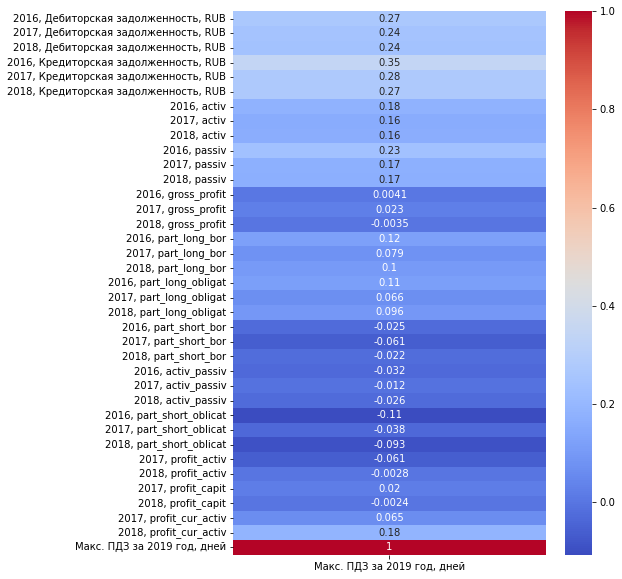

In [20]:
# df1.replace([np.inf, -np.inf], np.nan, inplace=True)
# df1 = df1.dropna(axis=0)

# fig = plt.figure(figsize=(7,10))
# df1_corr = df1.corr()
# sns.heatmap(df1_corr[['Макс. ПДЗ за 2019 год, дней']], 
#             annot=True,
#             cmap='coolwarm')

In [21]:
# X = df1.drop('Макс. ПДЗ за 2019 год, дней', axis=1)
# Y = df1['Макс. ПДЗ за 2019 год, дней']

# x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# model = XGBClassifier()
# model.fit(x_train, y_train)

# predictions = model.predict(x_test)
# accuracy = accuracy_score(y_test, predictions)
# print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/olgapalchul/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/olgapalchul/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[13:52:58] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 24.36%


In [29]:
df1 = df[['2016, Дебиторская задолженность, RUB', '2017, Дебиторская задолженность, RUB', '2018, Дебиторская задолженность, RUB', \
         '2016, Кредиторская задолженность, RUB', '2017, Кредиторская задолженность, RUB', '2018, Кредиторская задолженность, RUB', \
         '2016, activ', '2017, activ', '2018, activ', \
         '2016, passiv', '2017, passiv', '2018, passiv', \
         '2016, Основные средства , RUB', '2017, Основные средства , RUB', '2018, Основные средства , RUB', \
         '2016, Заёмные средства (долгосрочные), RUB', '2017, Заёмные средства (долгосрочные), RUB', '2018, Заёмные средства (долгосрочные), RUB', \
         '2016, Долгосрочные обязательства, RUB', '2017, Долгосрочные обязательства, RUB', '2018, Долгосрочные обязательства, RUB', \
         '2016, Заёмные средства (краткосрочные), RUB', '2017, Заёмные средства (краткосрочные), RUB', '2018, Заёмные средства (краткосрочные), RUB', \
         '2016, Краткосрочные обязательства, RUB', '2017, Краткосрочные обязательства, RUB', '2018, Краткосрочные обязательства, RUB', \
         'bool']]

<AxesSubplot:>

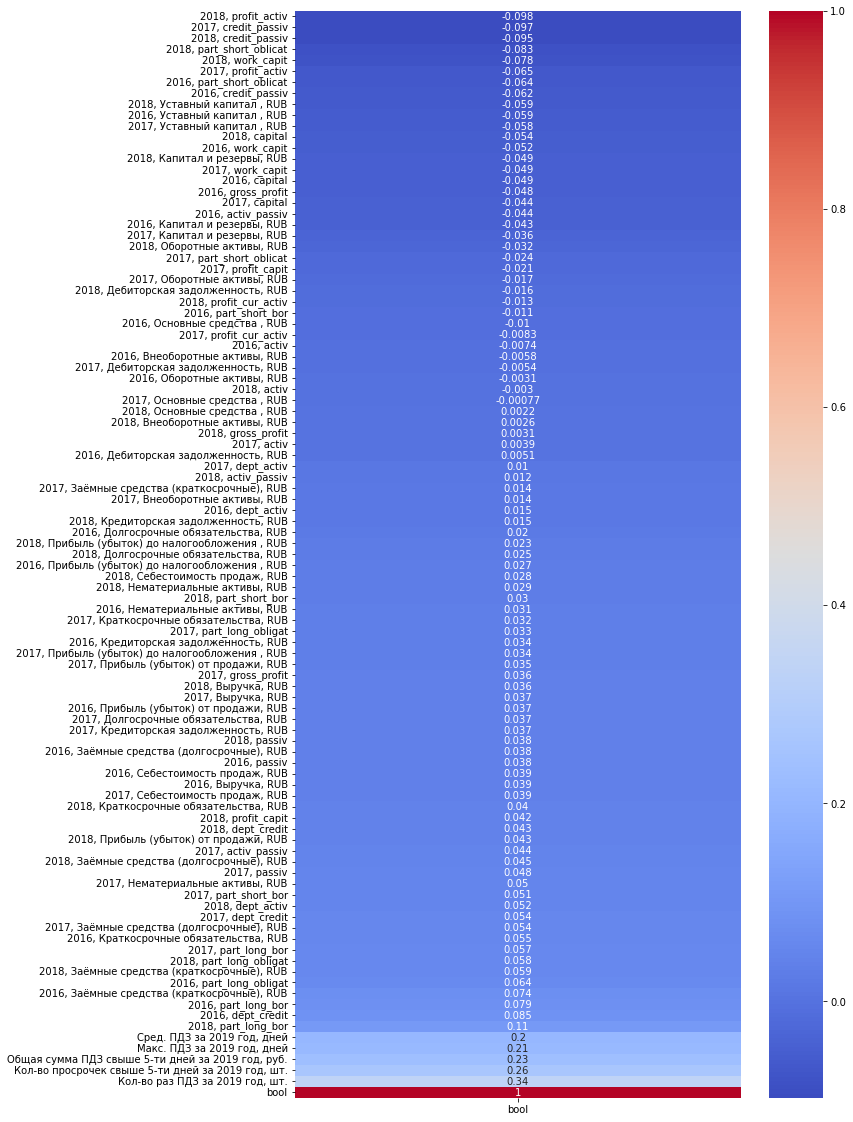

In [34]:
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1.dropna(axis=0)

fig = plt.figure(figsize=(10,20))
df_corr = df.corr().sort_values(by='bool')
sns.heatmap(df_corr[['bool']], 
            annot=True,
            cmap='coolwarm')

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostClassifier

X = df.drop(['bool', 'Макс. ПДЗ за 2019 год, дней',\
             'Кол-во просрочек свыше 5-ти дней за 2019 год, шт.', \
             'Кол-во раз ПДЗ за 2019 год, шт.', 'Сред. ПДЗ за 2019 год, дней'], axis=1)
Y = df['bool']

# X = PolynomialFeatures(degree=2).fit_transform(X)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

best_accuracy_percent = 0
best_model_parameters = None
for depth in [1, 3, 5, 7]:
    for iterations in [100]:
        for learning_rate in [0.003, 0.01, 0.03, 0.1, 0.3]:
            for l2_leaf_reg in [0.003, 0.01, 0.03, 0.1, 0.3]:
                for border_count in [4, 8, 16, 32, 64, 128]:
                    model = CatBoostClassifier(
                        depth=depth, iterations=iterations, learning_rate=learning_rate,
                        l2_leaf_reg =l2_leaf_reg, border_count=border_count,
                        use_best_model=True, verbose=False)
                    model.fit(x_train, y_train, eval_set=(x_test, y_test))

                    predictions = model.predict(x_test)
                    predictions = [True if (prediction == 'True') else False for prediction in predictions]
                    accuracy = accuracy_score(y_test, predictions)
                    accuracy_percent = accuracy * 100.0
                    current_model_parameters = 'depth={}, iterations={}, learning_rate={}, l2_leaf_reg={}, border_count={}'\
                        .format(depth, iterations, learning_rate, l2_leaf_reg, border_count)
                    if (best_accuracy_percent < accuracy_percent):
                        best_accuracy_percent = accuracy_percent
                        best_model_parameters = current_model_parameters
                        print("Accuracy: %.2f%%" % accuracy_percent, current_model_parameters)
                    
print("Best ccuracy: %.2f%%" % best_accuracy_percent, best_model_parameters)

Accuracy: 91.46% depth=1, iterations=100, learning_rate=0.003, l2_leaf_reg=0.003, border_count=4
Accuracy: 92.68% depth=1, iterations=100, learning_rate=0.1, l2_leaf_reg=0.003, border_count=8
Accuracy: 93.90% depth=1, iterations=100, learning_rate=0.3, l2_leaf_reg=0.003, border_count=128
Accuracy: 95.12% depth=3, iterations=100, learning_rate=0.1, l2_leaf_reg=0.01, border_count=32
Accuracy: 96.34% depth=3, iterations=100, learning_rate=0.3, l2_leaf_reg=0.03, border_count=32
Best ccuracy: 96.34% depth=3, iterations=100, learning_rate=0.3, l2_leaf_reg=0.03, border_count=32


In [22]:
df.info()
# columns1 = []
# for col in columns[1:]:
#     col = col.split(',')[1:]
#     col = ','.join(col).strip()
#     columns1.append(col)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 408 entries, 0 to 529
Data columns (total 99 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Макс. ПДЗ за 2019 год, дней                        408 non-null    int64  
 1   Сред. ПДЗ за 2019 год, дней                        408 non-null    float64
 2   Кол-во просрочек свыше 5-ти дней за 2019 год, шт.  408 non-null    int64  
 3   Общая сумма ПДЗ свыше 5-ти дней за 2019 год, руб.  408 non-null    float64
 4   Кол-во раз ПДЗ за 2019 год, шт.                    408 non-null    int64  
 5   2016, Нематериальные активы, RUB                   408 non-null    float64
 6   2017, Нематериальные активы, RUB                   408 non-null    float64
 7   2018, Нематериальные активы, RUB                   408 non-null    float64
 8   2016, Основные средства , RUB                      408 non-null    float64
 9   2017, Осно

Мы получили коэффициенты дебиторской и кредиторской задолженностей предприятия за год. Смысл коэффициента дебиторской задолженности - когда существенная часть актива складывается из долгов дебиторов, то велик риск не получить вовремя деньги. Если велик коэффициент кретитов - растет вероятность попасть в долги. 

In [ ]:
# df['turnov_dept_16'] = df['2016, Выручка, RUB'] / df['Сред. ПДЗ за 2019 год, дней']
# df['turnov_dept_16'].replace(inf, 0)